# Computing Vision Original Video Content Analysis 

<b>OVERVIEW<b>

This project profers three data driven recommendations for Computing Vision to support their diversification into the original-video content market. Computing vision can us the recommendations made within this analysis to influence their budgeting decisions, genre selection, and market entry strategy

<b>BUSINESS PROBLEM<b>

Computing Vision has decided to create a new movie studio, but they don’t have much background in creating movies. Recommendations on what types of films currently perform the best at the box office would help Computing Vision's new movie studio decide what type of films to create.

<b>DATA UNDERSTANDING<b>


The data used for this analysis came from Box Office, IMDB, Rotten Tomatoes, Movie DB, and Numbers. The datasets contain thousands of information describing different details about movies released within the past decade years. Some of the descriptors include, ratings, genres, budget, movie title, directors, movie revenue amongst others. 

In [2]:
import pandas as pd

In [3]:
movie_budget = pd.read_csv("Datasets/tn.movie_budgets.csv.gz")


In [4]:
import sqlite3

from zipfile import ZipFile
  
with ZipFile("Datasets/im.db.zip", 'r') as zObject:
    zObject.extractall(
        path="IMDB/")
conn = sqlite3.connect("IMDB/im.db")
cur = conn.cursor()
imdb= pd.read_sql('''
    SELECT * 
    FROM persons;

''', conn)
data =  """
SELECT *
FROM movie_ratings AS "mr" 
LEFT JOIN movie_basics AS "m"
    ON m.movie_ID=mr.movie_ID

"""
movie_data = pd.read_sql(data, conn)

In [5]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   movie_id         73856 non-null  object 
 4   primary_title    73856 non-null  object 
 5   original_title   73856 non-null  object 
 6   start_year       73856 non-null  int64  
 7   runtime_minutes  66236 non-null  float64
 8   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


<b>MOVIE BUDGET DATA<b>

This dataset consist information about movies from 1915 to 2020 with information about their domestic, foreign and worldwide gross  

In [7]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
movie_budget['Release_Date'] =  pd.to_datetime(movie_budget['release_date'])
movie_budget['Release_Date'].describe()

<ipython-input-8-82e8178cff15>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_budget['Release_Date'].describe()


count                    5782
unique                   2418
top       2014-12-31 00:00:00
freq                       24
first     1915-02-08 00:00:00
last      2020-12-31 00:00:00
Name: Release_Date, dtype: object

In [9]:
movie_budget['domestic_gross'].describe()

count     5782
unique    5164
top         $0
freq       548
Name: domestic_gross, dtype: object

<b>MOVIE DATA<b>

The movie dataset contains information from movie basic and movie rating table with records about different genres from year 2012 to 2019

In [10]:
movie_data.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [11]:
movie_data['start_year'].value_counts()

2016    8721
2017    8713
2015    8494
2014    8371
2013    7990
2012    7680
2018    7526
2011    7389
2010    6792
2019    2180
Name: start_year, dtype: int64

In [12]:
movie_data['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [13]:
movie_data['genres'].describe()

count     73052
unique      923
top       Drama
freq      11612
Name: genres, dtype: object

<b>DATA PREPARATION<b>

Both data sets are cleaned for maximun optimization. This include dropping unnecessary rows, adding new columns and edditing values within columns 

In [14]:
# Changing the columns from string to integer

movie_budget["domestic_gross"]= movie_budget["domestic_gross"].str.replace("$","")
movie_budget["domestic_gross"]= movie_budget["domestic_gross"].str.replace(",","")
movie_budget["domestic_gross"]= movie_budget["domestic_gross"].astype('int64', copy = False)

movie_budget["worldwide_gross"]= movie_budget["worldwide_gross"].str.replace("$","")
movie_budget["worldwide_gross"]= movie_budget["worldwide_gross"].str.replace(",","")
movie_budget["worldwide_gross"]= movie_budget["worldwide_gross"].astype('int64', copy = False)

movie_budget["production_budget"]= movie_budget["production_budget"].str.replace("$","")
movie_budget["production_budget"]= movie_budget["production_budget"].str.replace(",","")
movie_budget["production_budget"]= movie_budget["production_budget"].astype('int64', copy = False)

In [15]:
# Dropping unneccessary records 

movie = movie_data.dropna()

# Splitting grouped genres
movie['genres'] = movie["genres"].apply(lambda word: word.split(",")[0]);

<ipython-input-15-ac56bf4162cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['genres'] = movie["genres"].apply(lambda word: word.split(",")[0]);


In [18]:
# Adding new columns

movie_budget["foreign_gross"] = movie_budget["worldwide_gross"]  - movie_budget["domestic_gross"]

movie_budget["domestic_profit"] = movie_budget["domestic_gross"] - movie_budget["production_budget"]
movie_budget["foreign_profit"] = movie_budget["foreign_gross"] - movie_budget["production_budget"]
movie_budget["worldwide_profit"] = movie_budget["worldwide_gross"] - movie_budget["production_budget"]

movie_budget['domestic_profit_percentages'] = movie_budget['production_budget']/movie_budget['domestic_profit']
movie_budget['foreign_profit_percentages'] = movie_budget['production_budget']/movie_budget['foreign_profit']
movie_budget['worldwide_profit_percentages'] = movie_budget['production_budget']/movie_budget['worldwide_profit']


<b>DATA ANALYSIS<b>

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<B>AVERAGE PROFIT PERCEBTAGE FOR ALL MOVIES<B>

Movies with a small production budget have higher average percentage mean

In [26]:
# Defining production budget sizes and separating categories

def m_categories(budget):
    if budget <= 5000000:
        return 'small'
    elif budget > 5000000 and budget < 17000000:
        return 'medium'
    else:
        return 'large'
    
movie_budget['budget_size'] = movie_budget['production_budget'].map(m_categories)


In [24]:

dc = movie_budget.groupby('budget_size')

small_films = dc.get_group('small')
med_films = dc.get_group('medium')
lg_films = dc.get_group('large')

In [30]:
def m_classify(profit):
    if profit <= 0:
        return 'loser'
    elif profit > 0 and profit < .5:
        return 'scraper'
    else:
        return 'winner'

movie_budget['winners & losers'] = movie_budget['worldwide_profit_percentages'].map(m_classify)

In [31]:
ec = movie_budget.groupby('winners & losers')

wins = ec.get_group('winner')
loses = ec.get_group('loser')
scrapes = ec.get_group('scraper')

In [33]:
fc = wins.groupby('budget_size')

gc = loses.groupby('budget_size')


In [34]:
# Upon getting the means using the .describe()

data = {'film_sizes': ['small', 'medium', 'large'],
        'percentage_means': [1.769723, 0.120114, 0.700102]}
film_comp = pd.DataFrame(data)
film_comp

,film_sizes,percentage_means
0,small,1.769723
1,medium,0.120114
2,large,0.700102


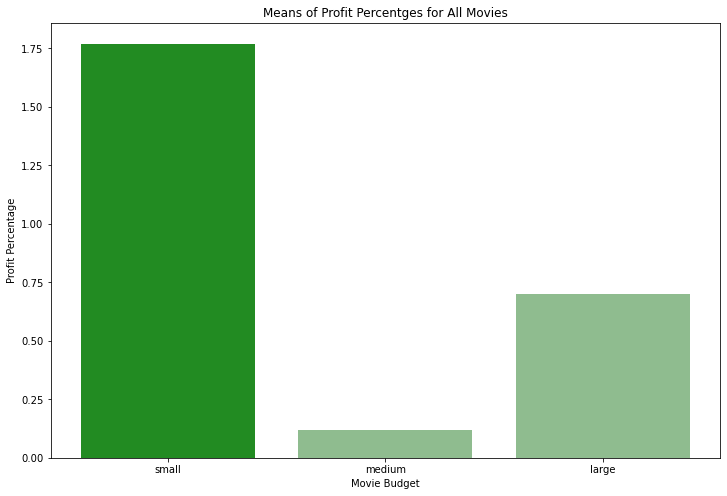

In [48]:
# Creating a bar plot

fig, ax = plt.subplots(figsize = (12, 8))
 
ax.bar(film_comp['film_sizes'], film_comp['percentage_means'], color=['forestgreen', 'darkseagreen', 'darkseagreen'])
 
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Profit Percentage")
ax.set_title("Means of Profit Percentges for All Movies")
plt.show()

**ADD ANALYSIS

  **BASED ON 
  
  **RECOMMENDATION 2
  
  **UP HERE

<b>GENRES AND RATING<b>

Most movies produced are Drama, Comedy, Documentary, Action and Horror genres. Documentary, Drama and Comedy genres are among the most rated genres of the top five genres.

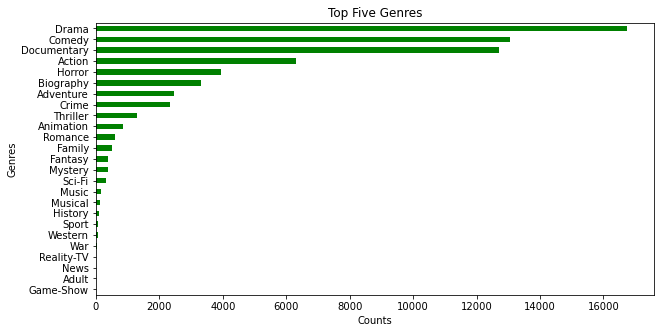

In [51]:
# Create a plot showing the number of genres 

fig, ax = plt.subplots(figsize=(10,5))

ax = movie["genres"].value_counts(ascending= True).plot(kind = 'barh', 
    color = ["green"] , grid=False)

plt.grid(False)
ax.set_title("Top Five Genres")
ax.set(xlabel="Counts" , ylabel="Genres");

<b>Now that we know the top five genres, let's look at these top 5 genres produced and deduce which of the genres has the highest rating</b>

In [58]:
top_5 = ["Drama", "Comedy", "Documentary", "Action","Horror"]
mv_new = movie[movie.genres.isin(top_5)]

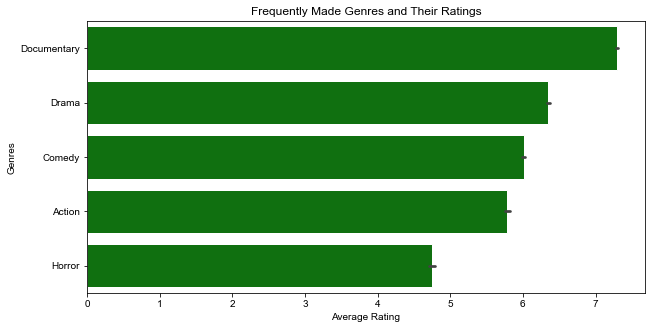

In [59]:
fig, ax = plt.subplots(figsize=(10,5))

sns.set(style="whitegrid", color_codes=True)
order= ["Documentary", "Drama", "Comedy", "Action", 'Horror']

sns.barplot(data=mv_new, x="averagerating", y="genres", 
              order = order, color = "green")

plt.grid(False)
ax.set(xlabel="Average Rating", ylabel="Genres")
ax.set_title("Frequently Made Genres and Their Ratings"); 

<b>MOVIE RUNTIME<b>

Short movies (movies with rutime of 56 minutes and lower) have higher rating than longer movies

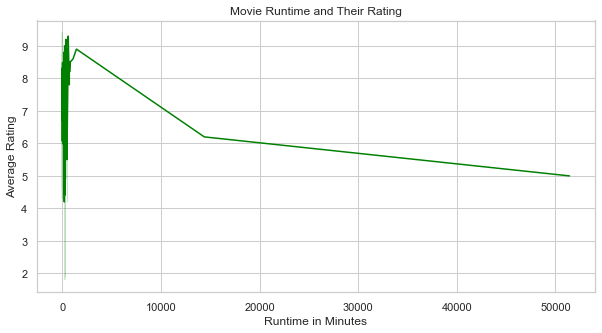

In [67]:
# Create a plot

fig, ax = plt.subplots(figsize=(10,5))
g = sns.lineplot(data=movie, color = "green", x='runtime_minutes', y='averagerating')

ax.set_title("Movie Runtime and Their Rating")
ax.set(xlabel="Runtime in Minutes", ylabel="Average Rating");

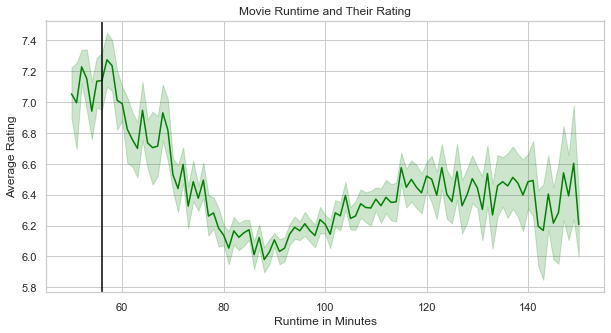

In [69]:
# Defining area of interest

interest = movie[(movie["runtime_minutes"] >=50.0) & (movie["runtime_minutes"] <=150.0)]

# Plotting area of interest

fig, ax = plt.subplots(figsize=(10,5))
g = sns.lineplot(data=interest, color = "green", x=interest['runtime_minutes'], y=interest['averagerating'])
g.axvline(x = 56, color = "black")
ax.set_title("Movie Runtime and Their Rating")
ax.set(xlabel="Runtime in Minutes", ylabel="Average Rating");

<b> Here, it seems movies with runtime at 56 minutes and lower have higher ratings than movies with longer runtime so we test this hypothesis against the population

Ho: Movies that have runtime less than 56 minutes do not have higher average rating
Ha: Movies that have runtime less than 56 minutes have higher average rating

<b>

In [71]:
# Movie dataframe equals population data

movie.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,65720.000000,6.572000e+04,65720.000000,65720.000000
mean,6.320902,3.954674e+03,2014.258065,94.732273
std,1.458878,3.208823e+04,2.600143,209.377017
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.600000e+01,2012.000000,81.000000
50%,6.500000,6.200000e+01,2014.000000,91.000000
75%,7.300000,3.520000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


In [72]:
# Creating the sample from the population

sample= movie[(movie["runtime_minutes"] >=0) & (movie["runtime_minutes"] <=56.0)]

# Stat summary of sample

sample.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,3036.000000,3036.000000,3036.000000,3036.000000
mean,7.144730,58.434124,2013.805007,47.829051
std,1.427123,546.470661,2.514968,9.537272
min,1.000000,5.000000,2010.000000,3.000000
25%,6.500000,7.000000,2012.000000,46.000000
50%,7.300000,12.000000,2014.000000,51.000000
75%,8.200000,26.000000,2016.000000,53.000000
max,10.000000,25596.000000,2019.000000,56.000000


<b> Where average rating = population mean of 6.32
    
    Ho: MUo <= 6.32
    Ha: MUo > 6.32

This is a one-tailed Z test because we know the sample size is more than 30, and we know the population standard deviation.
<b>

In [76]:
import numpy as np
import scipy.stats as stats

x_bar = 7.14 #Sample mean
MU = 6.32 #Population mean
n = 3036 #Sample size
sigma = 1.46 #Population SD
alpha = 0.05 

# Calculating the z-statistic and the p-value

z = (x_bar - MU)/(sigma/np.sqrt(n))
p_value = stats.norm.sf(z)
p_value

1.4147365585113178e-210

<b> The p_value is less than alpha of 0.05, this means we reject the null hypothesis. The movies with runtime less tham 56 minutes have significantly higher rating. <b>

<b> CONCLUSION <b>

This analysis leads to four recommedations for Computing Vision original video content creation endeavour

- Invest in movies that cost lower than 5 million for budget optimization
- Launch their movie domestically, before expanding to foreign markets 
- Focus on documentary, drama, and comedy genres because they are the frequently made genres with the most ratings
- Make short movies because they are rated favorably than longer movies

<b> NEXT STEPS<B>

Further analysis could yield insights on

- How much money should be spent per genre cause the most amount of money
- What kind of genres have the highest screentime
- How muchtime it takes to produce movies based on genres